In [34]:
import tensorflow as tf
import matplotlib as mpl
import pandas as pd

In [35]:
mpl.rcParams['figure.figsize'] = (20, 6)
mpl.rcParams['axes.grid'] = False

In [46]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [92]:
csv_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/cmmju_15min_filled_extra.csv.tar.gz')
    # origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/cmmju_15min_filled.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/merge_15min_filled.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/merge_15min.csv.zip')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/device-1_filled.csv.zip')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-land_timeseries_filled.csv.zip')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/device-1.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/export_device_1_basic_aggregated_1hour.csv.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/utci_selected_timeseries.csv.tar.gz')
    # origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-hourly_timeseries.csv.tar.gz')
    # origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-land_timeseries.csv.tar.gz')
csv_path

'C:\\Users\\ASUS\\.keras\\datasets\\cmmju_15min_filled_extra.csv.tar.gz'

In [93]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: 'datetime'})
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 138238


,datetime,ambient_temp,current_power,value_of_consumption,external_energy_supply,grid_feed_in,internal_power_supply,self_consumption,module_temp,total_irradiation,...,tp,u10,v10,equation_of_time_min,zenith_deg,elevation_deg,azimuth_deg,declination_deg,hour_angle_deg,incidence_deg
0,2021-11-06 11:15:00,30.288889,46519.355556,37280.422222,0.0,9238.933333,37280.422222,37280.422222,58.022222,798.444444,...,0.0,0.0,0.0,16.244239,36.998137,53.001863,158.619243,-15.751553,-13.176451,36.998137
1,2021-11-06 11:30:00,30.076923,47600.714286,39472.626374,0.0,9397.756098,39132.406593,39132.406593,58.263736,812.571429,...,0.0,0.0,0.0,16.243603,35.874705,54.125295,164.395912,-15.754719,-9.426610,35.874705
2,2021-11-06 11:45:00,30.629213,47056.988764,32669.393258,0.0,14387.595506,32669.393258,32669.393258,57.235955,807.224719,...,0.0,0.0,0.0,16.242965,35.105017,54.894983,170.471336,-15.757885,-5.676769,35.105017
3,2021-11-06 12:00:00,31.021978,48415.835165,36126.516484,0.0,12289.318681,36126.516484,36126.516484,56.846154,817.527473,...,0.0,0.0,0.0,16.242326,34.712629,55.287371,176.742301,-15.761050,-1.926929,34.712629
4,2021-11-06 12:15:00,31.831461,49345.404494,36879.966292,0.0,12465.438202,36879.966292,36879.966292,55.842697,816.651685,...,0.0,0.0,0.0,16.241685,34.710348,55.289652,183.081860,-15.764215,1.822911,34.710348


In [94]:
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")

incidence_deg: 69011 missing values


In [87]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

In [88]:
# Convert 'timestamp' column to datetime
df = df.set_index('datetime')

print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021, 2022, 2023, 2024, 2025], dtype='int32', name='datetime')
datetime
2024    35136
2023    35040
2022    35040
2025    27691
2021     5331
Name: count, dtype: int64


In [89]:
start = df.index.min()
end = df.index.max()
print(start)
print(end)

2021-11-06 11:15:00
2025-10-16 10:30:00


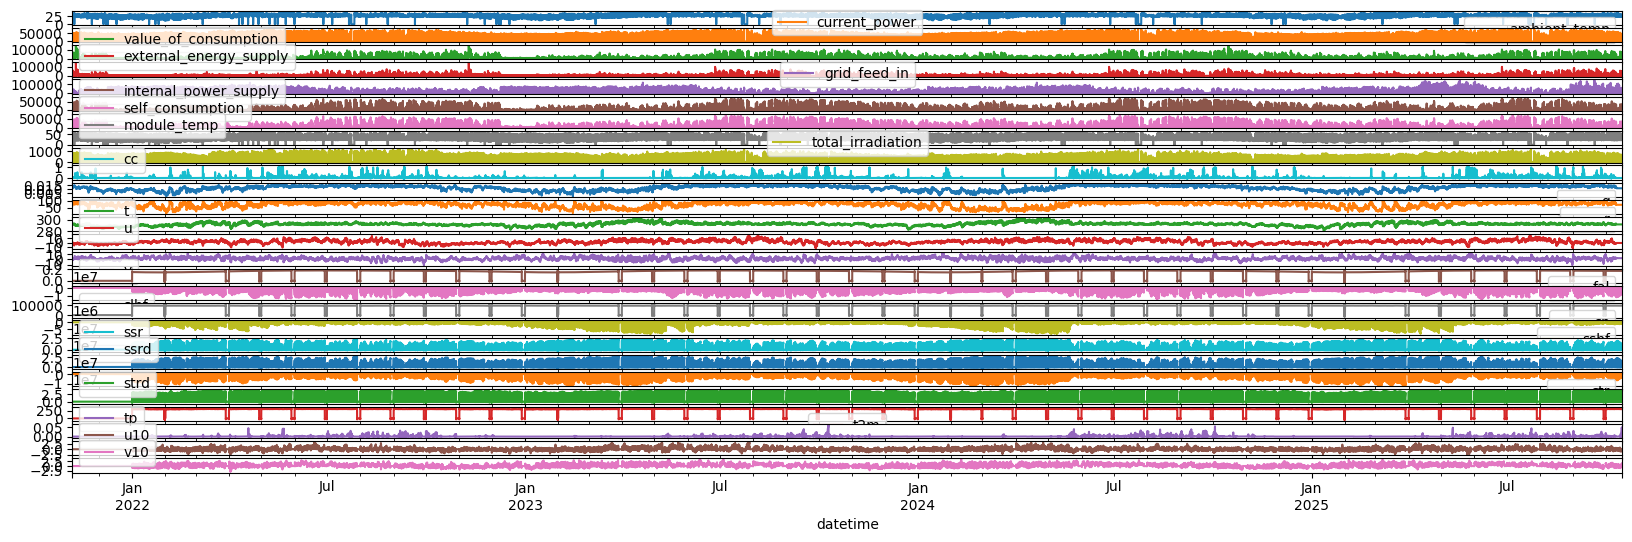

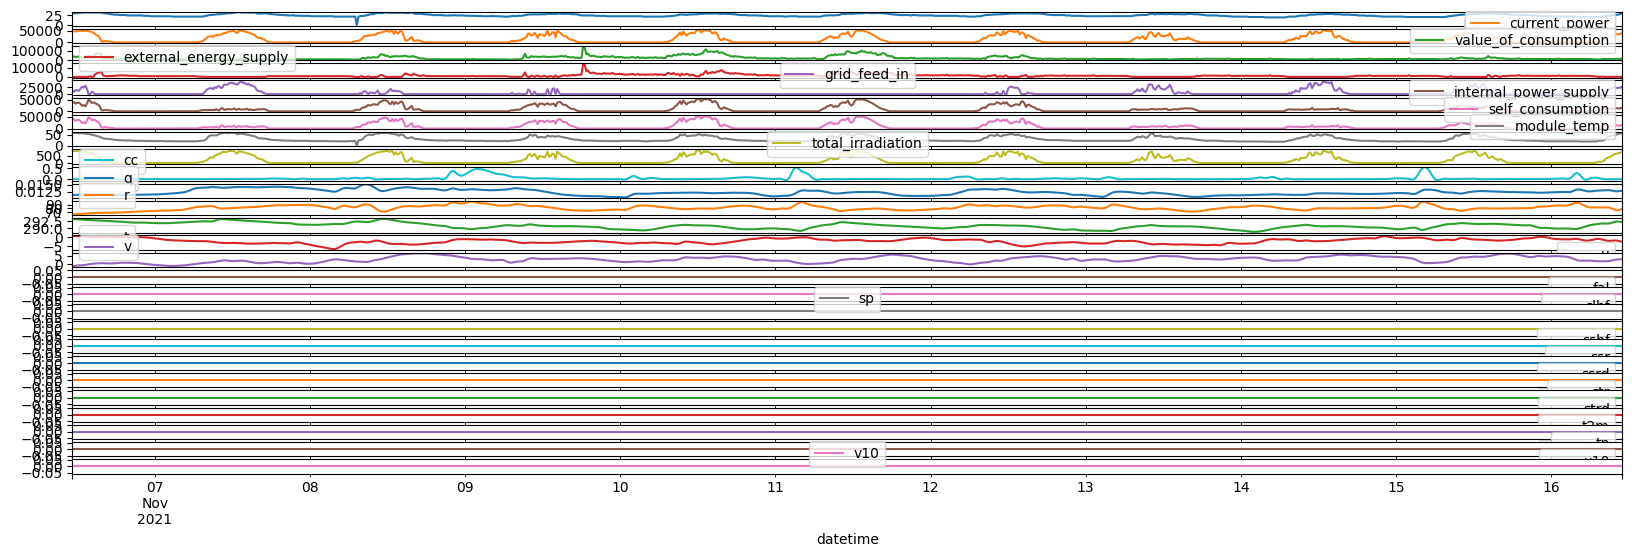

In [90]:
display_all(df)

In [91]:
df.min()

ambient_temp              0.000000e+00
current_power             0.000000e+00
value_of_consumption      0.000000e+00
external_energy_supply    0.000000e+00
grid_feed_in              0.000000e+00
internal_power_supply     0.000000e+00
self_consumption          0.000000e+00
module_temp               0.000000e+00
total_irradiation         0.000000e+00
cc                       -1.101628e-01
q                         9.365255e-04
r                         5.090677e+00
t                         2.807780e+02
u                        -1.205189e+01
v                        -1.103489e+01
fal                      -2.820380e-02
slhf                     -1.528065e+07
sp                       -1.851603e+04
sshf                     -8.831090e+06
ssr                      -3.413031e+06
ssrd                     -3.994695e+06
str                      -1.210385e+07
strd                     -4.640860e+06
t2m                      -5.778392e+01
tp                       -4.563100e-03
u10                      